# **Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


#**Load the dataset**


In [ ]:

train_df = pd.read_csv('/content/kdd_train.csv')
test_df = pd.read_csv('/content/kdd_test.csv')



---



# **Data Glance**

## **First 5 rows of the Dataset**

In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## **Total Row's and Column's of the Dataset**

In [ ]:
train_df.shape

(125973, 42)

##**Verifying Null values and their data types**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train_df.duplicated().sum()

0



---



# **Label Encoding with -1 for Unseen Values**

In [ ]:
encoders={}

for col in ['protocol_type', 'service', 'flag', 'labels']:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = test_df[col].apply(
        lambda value: encoder.transform(
        [value])[0] if value in encoder.classes_ else -1)
    encoders[col] = encoder


# **Prepare Data**

In [ ]:
X_train = train_df.drop(columns='labels')
y_train = train_df['labels']

X_test = test_df.drop(columns = 'labels')
y_test = test_df['labels']

# **Scailing Data**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Decision Tree - Grid Search CV**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Decision Tree Results:
  Best Parameters: {'max_depth': 7, 'min_samples_split': 2}
  Accuracy: 0.9038
  Precision: 0.8385
  Recall: 0.9038
  F1 Score: 0.8669


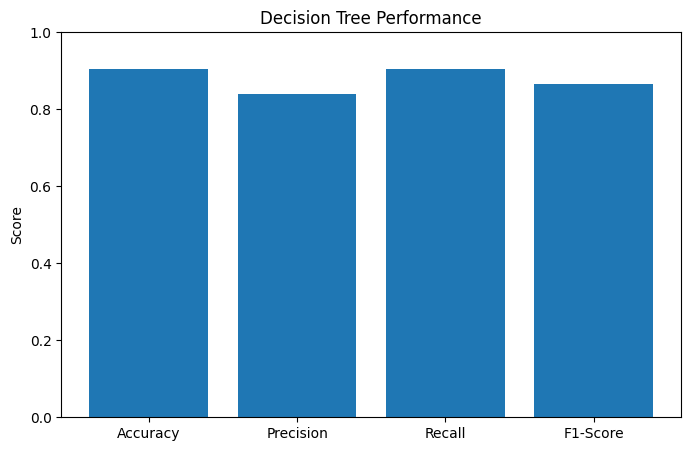

In [ ]:
# Decision Tree Grid Search CV
param_grid_dt = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', verbose = 0)
grid_search_dt.fit(X_train, y_train)

# Print best parameters
print("Decision Tree Results:")
print(f"  Best Parameters: {grid_search_dt.best_params_}")

dt_best_model = grid_search_dt.best_estimator_
y_pred_dt = dt_best_model.predict(X_test)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, zero_division=0, average = 'weighted')
recall_dt = recall_score(y_test, y_pred_dt, zero_division=0, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0, average = 'weighted')

# Print evaluation metrics
print(f"  Accuracy: {accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall: {recall_dt:.4f}")
print(f"  F1 Score: {f1_dt:.4f}")

# Plotting
metrics = {'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1-Score': f1_dt}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Decision Tree Performance')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



---



# **Random Forest - Grid Search CV**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



Random Forest Results:
  Best Parameters: {'max_depth': 15, 'n_estimators': 50}
  Accuracy: 0.9126
  Precision: 0.8708
  Recall: 0.9126
  F1 Score: 0.8746


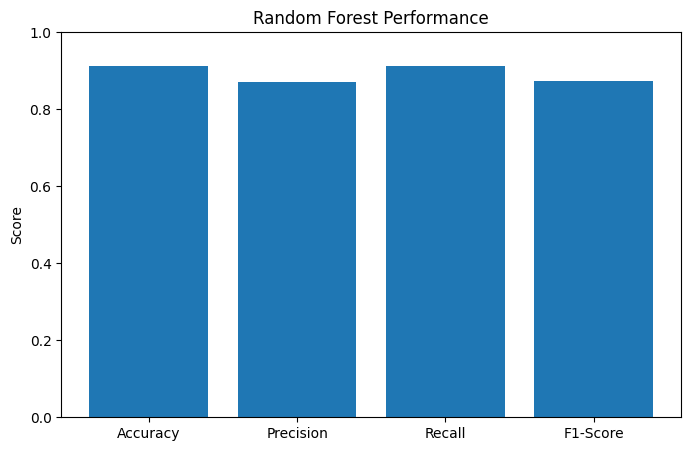

In [ ]:
# Random Forest Grid Search CV
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', verbose = 0)
grid_search_rf.fit(X_train, y_train)

# Print best parameters
print("\nRandom Forest Results:")
print(f"  Best Parameters: {grid_search_rf.best_params_}")

rf_best_model = grid_search_rf.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0, average = 'weighted')
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0, average = 'weighted')


# Print evaluation metrics
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1 Score: {f1_rf:.4f}")


# Plotting
metrics = {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1-Score': f1_rf}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Random Forest Performance')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



---



# **KNN - Grid Search CV**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



KNN Results:
  Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
  Accuracy: 0.9080
  Precision: 0.8666
  Recall: 0.9080
  F1 Score: 0.8717


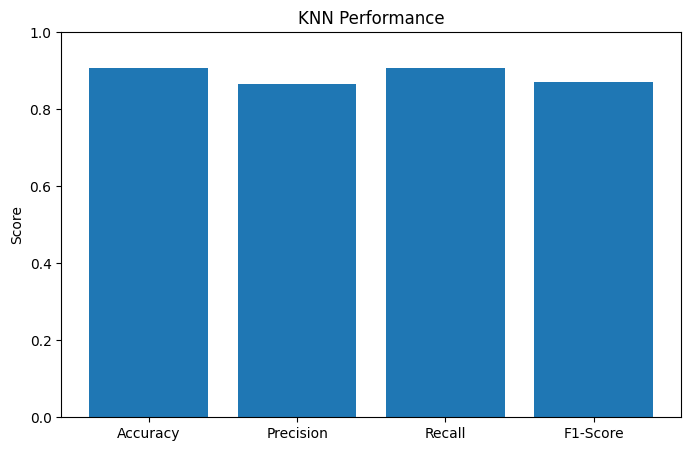

In [ ]:
# KNN Grid Search CV
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', verbose = 0)
grid_search_knn.fit(X_train, y_train)

# Print best parameters
print("\nKNN Results:")
print(f"  Best Parameters: {grid_search_knn.best_params_}")

knn_best_model = grid_search_knn.best_estimator_
y_pred_knn = knn_best_model.predict(X_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=0, average = 'weighted')
recall_knn = recall_score(y_test, y_pred_knn, zero_division=0, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, zero_division=0, average = 'weighted')


# Print evaluation metrics
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall: {recall_knn:.4f}")
print(f"  F1 Score: {f1_knn:.4f}")

# Plotting
metrics = {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1-Score': f1_knn}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('KNN Performance')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



---



# **XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results (No Grid Search):
  Accuracy: 0.9131
  Precision: 0.8732
  Recall: 0.9131
  F1 Score: 0.8759


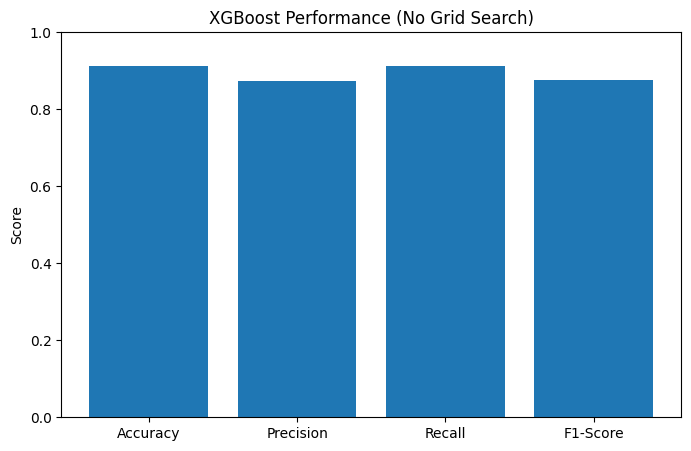

In [ ]:

#XGBoost
xgb_model = xgb.XGBClassifier(max_depth= 5, n_estimators= 100, learning_rate = 0.1, random_state= 42, use_label_encoder= False, eval_metric= 'logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=0, average = 'weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, zero_division=0, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=0, average = 'weighted')

# Print evaluation metrics
print("XGBoost Results (No Grid Search):")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall: {recall_xgb:.4f}")
print(f"  F1 Score: {f1_xgb:.4f}")

# Plotting
metrics = {'Accuracy': accuracy_xgb, 'Precision': precision_xgb, 'Recall': recall_xgb, 'F1-Score': f1_xgb}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('XGBoost Performance (No Grid Search)')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



---



# **SVM - Grid Search CV**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



SVM Results:
  Best Parameters: {'C': 10, 'kernel': 'rbf'}
  Accuracy: 0.9083
  Precision: 0.8689
  Recall: 0.9083
  F1 Score: 0.8715


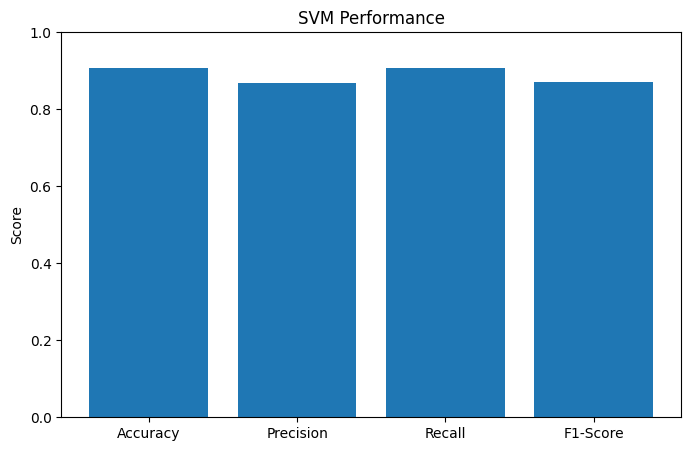

In [ ]:

# SVM Grid Search CV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring='accuracy', verbose = 0)
grid_search_svm.fit(X_train, y_train)

# Print best parameters
print("\nSVM Results:")
print(f"  Best Parameters: {grid_search_svm.best_params_}")

svm_best_model = grid_search_svm.best_estimator_
y_pred_svm = svm_best_model.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, zero_division=0, average = 'weighted')
recall_svm = recall_score(y_test, y_pred_svm, zero_division=0, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, zero_division=0, average = 'weighted')

# Print evaluation metrics
print(f"  Accuracy: {accuracy_svm:.4f}")
print(f"  Precision: {precision_svm:.4f}")
print(f"  Recall: {recall_svm:.4f}")
print(f"  F1 Score: {f1_svm:.4f}")


# Plotting
metrics = {'Accuracy': accuracy_svm, 'Precision': precision_svm, 'Recall': recall_svm, 'F1-Score': f1_svm}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('SVM Performance')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



---



# **Logistic Regression**


Logistic Regression Results:
  Accuracy: 0.8932
  Precision: 0.8383
  Recall: 0.8932
  F1 Score: 0.8551


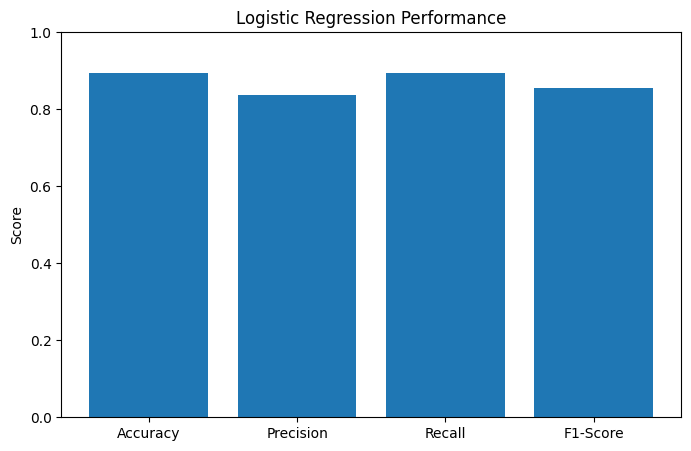

In [ ]:

# Create and fit the model
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, zero_division=0, average = 'weighted')
recall_lr = recall_score(y_test, y_pred_lr, zero_division=0, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, zero_division=0, average = 'weighted')

# Print evaluation metrics
print("\nLogistic Regression Results:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1 Score: {f1_lr:.4f}")

# Plotting
metrics = {'Accuracy': accuracy_lr, 'Precision': precision_lr, 'Recall': recall_lr, 'F1-Score': f1_lr}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Logistic Regression Performance')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()



---



# **Testing Models With Sample Input (Safe and Attack)**

In [ ]:
test_input_normal = {
    'duration': [0],
    'protocol_type': [1],
    'service': [20],
    'flag': [9],
    'src_bytes': [491],
    'dst_bytes': [0],
    'land': [0],
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [0],
    'num_compromised': [0],
    'root_shell': [0],
    'su_attempted': [0],
    'num_root': [0],
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],
    'is_guest_login': [0],
    'count': [1],
    'srv_count': [1],
    'serror_rate': [0.00],
    'srv_serror_rate': [0.00],
    'rerror_rate': [0.00],
    'srv_rerror_rate': [0.00],
    'same_srv_rate': [0.17],
    'diff_srv_rate': [0.03],
    'srv_diff_host_rate': [0.00],
    'dst_host_count': [25],
    'dst_host_srv_count': [25],
    'dst_host_same_srv_rate': [0.17],
    'dst_host_diff_srv_rate': [0.03],
    'dst_host_same_src_port_rate': [0.17],
    'dst_host_srv_diff_host_rate': [0.00],
    'dst_host_serror_rate': [0.00],
    'dst_host_srv_serror_rate': [0.00],
    'dst_host_rerror_rate': [0.05],
    'dst_host_srv_rerror_rate': [0.00]


}
test_input_normal_df = pd.DataFrame(test_input_normal)
test_input_normal_scaled = scaler.transform(test_input_normal_df)


test_input_attack = {
    'duration': [0],
    'protocol_type': [1],
    'service': [19],
    'flag': [4],
    'src_bytes': [0],
    'dst_bytes': [0],
    'land': [0],
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [0],
    'num_compromised': [0],
    'root_shell': [0],
    'su_attempted': [0],
    'num_root': [0],
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],
    'is_guest_login': [0],
    'count': [121],
    'srv_count': [19],
    'serror_rate': [0.00],
    'srv_serror_rate': [0.00],
    'rerror_rate': [1.00],
    'srv_rerror_rate': [1.00],
    'same_srv_rate': [0.16],
    'diff_srv_rate': [0.06],
    'srv_diff_host_rate': [0.00],
    'dst_host_count': [255],
    'dst_host_srv_count': [19],
    'dst_host_same_srv_rate': [0.07],
    'dst_host_diff_srv_rate': [0.07],
    'dst_host_same_src_port_rate': [0.00],
    'dst_host_srv_diff_host_rate': [0.00],
    'dst_host_serror_rate': [0.00],
    'dst_host_srv_serror_rate': [0.00],
    'dst_host_rerror_rate': [1.00],
    'dst_host_srv_rerror_rate': [1.00]
}


# Create DataFrame from test input
test_input_df = pd.DataFrame(test_input_attack)

# Scale the test input with the same scaler
test_input_attack_scaled = scaler.transform(test_input_df)





---



# **For Decision Tree Model**

## **Testing DT for Safe Input (Normal)**

In [ ]:

prediction_normal = dt_best_model.predict(test_input_normal_scaled)


#Decode and Print Predictions
label_encoder = encoders['labels']
decoded_prediction_normal = label_encoder.inverse_transform(prediction_normal)


print(f"Prediction for Normal Test Input Using DT: {decoded_prediction_normal[0]}")

Prediction for Normal Test Input Using DT: normal


## **Testing DT for Attack Input (Neptune)**

In [ ]:

prediction_attack = dt_best_model.predict(test_input_attack_scaled)

label_encoder = encoders['labels']

decoded_prediction_attack = label_encoder.inverse_transform(prediction_attack)
print(f"\nPrediction for Attack Test Input Using DT: {decoded_prediction_attack[0]}")



Prediction for Attack Test Input Using DT: neptune




---



# **Now for SVM Model**

## **Testing SVM for Safe Input (Normal)**

In [ ]:

prediction_normal = svm_best_model.predict(test_input_normal_scaled)


# Decode and Print Predictions
label_encoder = encoders['labels']
decoded_prediction_normal = label_encoder.inverse_transform(prediction_normal)


print(f"Prediction for Normal Test Input Using SVM: {decoded_prediction_normal[0]}")

Prediction for Normal Test Input Using SVM: normal


## **Testing SVM for Attack Input (Neptune)**

In [ ]:

prediction_attack = svm_best_model.predict(test_input_attack_scaled)

label_encoder = encoders['labels']

decoded_prediction_attack = label_encoder.inverse_transform(prediction_attack)
print(f"\nPrediction for Attack Test Input Using SVM: {decoded_prediction_attack[0]}")



Prediction for Attack Test Input Using SVM: neptune




---



# **Now for Logistic Regression Model**

## **Testing LR for Safe Input (Normal)**

In [ ]:

prediction = logistic_regression_model.predict(test_input_normal_scaled)

#  Decode and Print Prediction
label_encoder = encoders['labels']
decoded_prediction = label_encoder.inverse_transform(prediction)
print(f"\nPrediction for Test Input USING LR: {decoded_prediction[0]}")


Prediction for Test Input USING LR: normal


## **Testing LR for Attack Input (Neptune)**

In [ ]:

prediction = logistic_regression_model.predict(test_input_attack_scaled)

# Decode and Print Prediction
label_encoder = encoders['labels']
decoded_prediction = label_encoder.inverse_transform(prediction)
print(f"\nPrediction for Test Input Using LR: {decoded_prediction[0]}")


Prediction for Test Input Using LR: neptune




---



# **Learing and Validation Curve for the best performing Model (Random Forest)**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


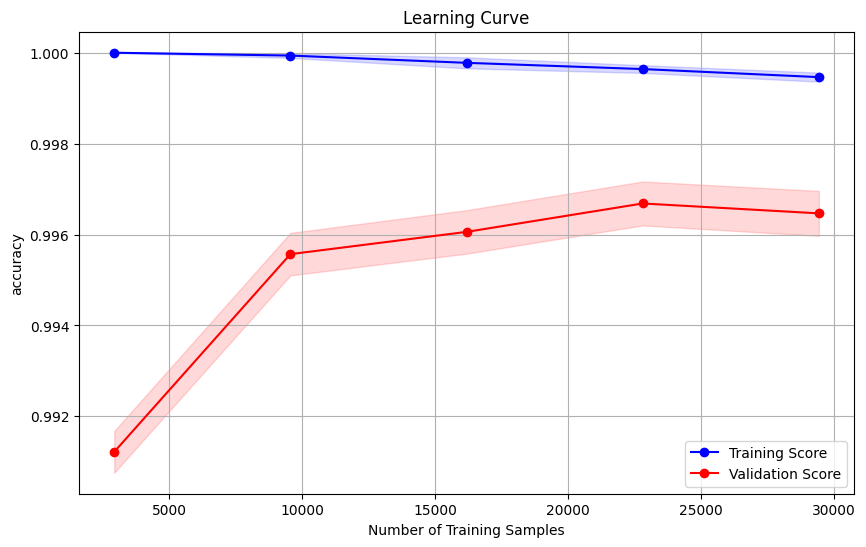

In [ ]:
def plot_learning_curve(model, X, y, cv=5, scoring='accuracy'):
  train_sizes, train_scores, val_scores = learning_curve(
      model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 5)) # train size in steps

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  val_mean = np.mean(val_scores, axis=1)
  val_std = np.std(val_scores, axis=1)

  plt.figure(figsize=(10,6))
  plt.plot(train_sizes, train_mean, color='b', marker='o', label='Training Score')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color='b', alpha=0.15)
  plt.plot(train_sizes, val_mean, color='r', marker='o', label='Validation Score')
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, color='r', alpha=0.15)

  plt.title('Learning Curve')
  plt.xlabel('Number of Training Samples')
  plt.ylabel(scoring)
  plt.grid(True)
  plt.legend(loc='best')
  plt.show()

#Plotting Learning Curve
plot_learning_curve(rf_best_model, X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


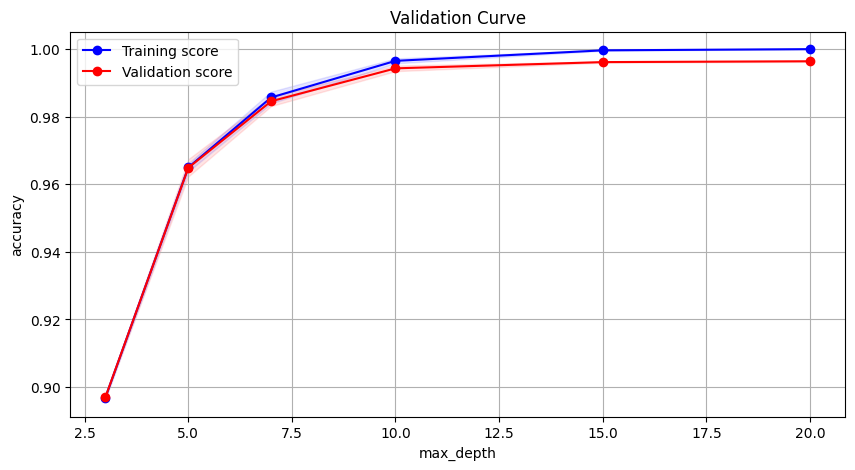

In [ ]:

def plot_validation_curve(model, X, y, param_name, param_range, cv=3, scoring='accuracy'):
    train_scores, test_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 5))
    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.grid(True)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="r")
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label='Training score')
    plt.plot(param_range, test_scores_mean, 'o-', color='r', label='Validation score')

    plt.legend(loc='best')
    plt.show()
param_range_max_depth =  [3, 5, 7, 10, 15, 20]
param_range_min_sample_split = [2, 5, 10, 15, 20, 25]

plot_validation_curve(RandomForestClassifier(random_state = 42), X_train, y_train, 'max_depth', param_range_max_depth )


In [ ]:

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluates model and presents metrics in a table."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_table = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Training': [accuracy_score(y_train, y_train_pred),
                     precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
                     recall_score(y_train, y_train_pred, average='weighted', zero_division=0),
                     f1_score(y_train, y_train_pred, average='weighted', zero_division=0)],

        'Test': [accuracy_score(y_test, y_test_pred),
                precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
                recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
                f1_score(y_test, y_test_pred, average='weighted', zero_division=0)]
    })
    print("\nTabular Metrics Comparison:")
    print(metrics_table)

#Evaluate using the function
evaluate_model(rf_best_model, X_train, y_train, X_test, y_test)


Tabular Metrics Comparison:
      Metric  Training      Test
0   Accuracy  0.999456  0.912615
1  Precision  0.999429  0.870788
2     Recall  0.999456  0.912615
3   F1-Score  0.999437  0.874649


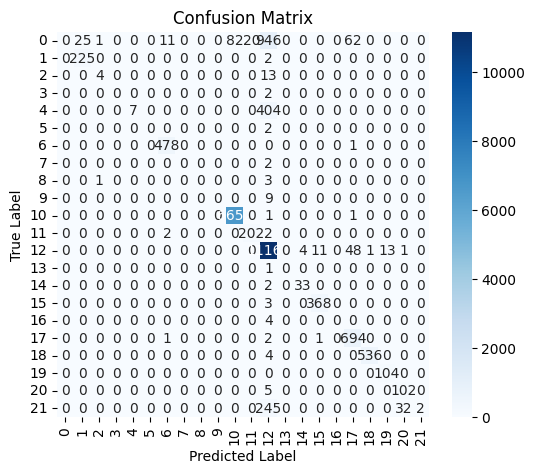

In [ ]:

def plot_confusion_matrix(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

plot_confusion_matrix(rf_best_model, X_test, y_test)